In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Read file

This is just a small demo output obtained from the default configuration.

In [2]:
ls -lh ./RBC100K_Pr1.exo

-rw-r--r--  1 zhuangjw  staff    20M Mar  5 12:15 ./RBC100K_Pr1.exo


In [3]:
ds = xr.open_dataset('./RBC100K_Pr1.exo')

In [4]:
ds

<xarray.Dataset>
Dimensions:            (four: 4, num_dim: 2, num_el_blk: 1, num_el_in_blk1: 400, num_elem_var: 2, num_info: 3, num_nod_ns1: 1, num_nod_per_el1: 4, num_nod_var: 4, num_node_sets: 2, num_nodes: 451, num_qa_rec: 2, num_side_sets: 4, time_step: 1022)
Dimensions without coordinates: four, num_dim, num_el_blk, num_el_in_blk1, num_elem_var, num_info, num_nod_ns1, num_nod_per_el1, num_nod_var, num_node_sets, num_nodes, num_qa_rec, num_side_sets, time_step
Data variables:
    info_records       (num_info) |S81 ...
    qa_records         (num_qa_rec, four) |S33 ...
    time_whole         (time_step) float64 ...
    eb_status          (num_el_blk) int32 ...
    eb_prop1           (num_el_blk) int32 ...
    eb_names           (num_el_blk) |S33 ...
    ns_status          (num_node_sets) int32 ...
    ns_prop1           (num_node_sets) int32 ...
    ns_names           (num_node_sets) |S33 ...
    ss_status          (num_side_sets) int32 ...
    ss_prop1           (num_side_sets) int

# Basic variable information

In [5]:
ds['time_step']

<xarray.DataArray 'time_step' (time_step: 1022)>
array([   0,    1,    2, ..., 1019, 1020, 1021])
Dimensions without coordinates: time_step

In [6]:
# X/Y coordinate values are stored as 1D arrays, not 2D mesh
ds['coordx']

<xarray.DataArray 'coordx' (num_nodes: 451)>
array([0. , 0.5, 1. , ..., 4. , 4.5, 5. ])
Dimensions without coordinates: num_nodes

In [7]:
ds['coordy']

<xarray.DataArray 'coordy' (num_nodes: 451)>
array([-1., -1., -1., ...,  1.,  1.,  1.])
Dimensions without coordinates: num_nodes

In [8]:
ds.dims['num_nod_var']  # number of variables

4

In [9]:
ds['name_nod_var'] # Variable names

<xarray.DataArray 'name_nod_var' (num_nod_var: 4)>
array([b'PRESSURE', b'TEMPERATURE', b'UX', b'UY'], dtype='|S33')
Dimensions without coordinates: num_nod_var

In [10]:
# mapping between NetCDF variable names and actual meaning
dr_p = ds['vals_nod_var1'].rename('pressure')  # PRESSURE
dr_t = ds['vals_nod_var2'].rename('tempurature')  # TEMPERATURE
dr_ux = ds['vals_nod_var3'].rename('ux') # x velocity
dr_uy = ds['vals_nod_var4'].rename('uy') # y velocity

In [11]:
dr_t

<xarray.DataArray 'tempurature' (time_step: 1022, num_nodes: 451)>
[460922 values with dtype=float64]
Dimensions without coordinates: time_step, num_nodes

In [12]:
dr_t[0] # first time slice

<xarray.DataArray 'tempurature' (num_nodes: 451)>
array([ 2.000000e+00,  2.000000e+00,  2.000000e+00, ..., -1.499760e-33,
        4.329780e-18,  6.123234e-18])
Dimensions without coordinates: num_nodes

# Plotting with 1D array

We can't use `plt.pcolormesh` on 1D data, but `plt.scatter` works.

In [13]:
dr_x = ds['coordx']
dy_y = ds['coordy']

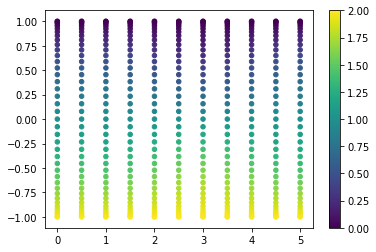

In [14]:
plt.scatter(ds['coordx'], ds['coordy'], s=20, c=dr_t[0].values)
plt.colorbar()
# heating at the bottom

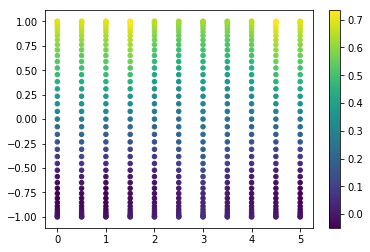

In [15]:
plt.scatter(ds['coordx'], ds['coordy'], s=20, c=dr_p[-1].values)
plt.colorbar()

# Plot with 2D data

## Check grid structure

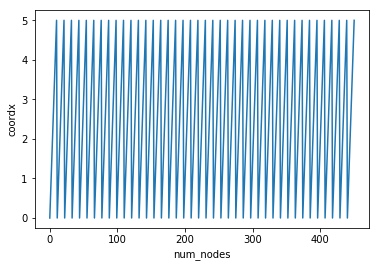

In [16]:
ds['coordx'].plot()

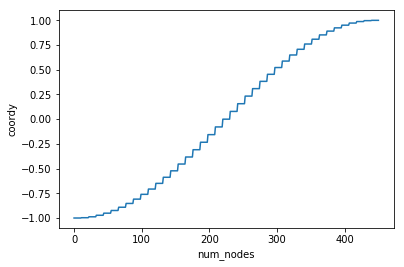

In [17]:
ds['coordy'].plot()

In [18]:
# number of grid cells in each dimension
nx = 11
ny = 41
nx * ny

451

In [19]:
x_1d = ds['coordx'][0:11]
x_1d

<xarray.DataArray 'coordx' (num_nodes: 11)>
array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])
Dimensions without coordinates: num_nodes

In [20]:
y_1d = ds['coordy'][::11]
y_1d

<xarray.DataArray 'coordy' (num_nodes: 41)>
array([-1.000000e+00, -9.969173e-01, -9.876883e-01, -9.723699e-01,
       -9.510565e-01, -9.238795e-01, -8.910065e-01, -8.526402e-01,
       -8.090170e-01, -7.604060e-01, -7.071068e-01, -6.494480e-01,
       -5.877853e-01, -5.224986e-01, -4.539905e-01, -3.826834e-01,
       -3.090170e-01, -2.334454e-01, -1.564345e-01, -7.845910e-02,
       -1.110223e-16,  7.845910e-02,  1.564345e-01,  2.334454e-01,
        3.090170e-01,  3.826834e-01,  4.539905e-01,  5.224986e-01,
        5.877853e-01,  6.494480e-01,  7.071068e-01,  7.604060e-01,
        8.090170e-01,  8.526402e-01,  8.910065e-01,  9.238795e-01,
        9.510565e-01,  9.723699e-01,  9.876883e-01,  9.969173e-01,
        1.000000e+00])
Dimensions without coordinates: num_nodes

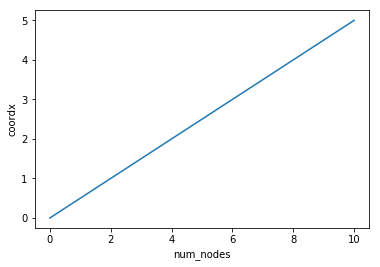

In [21]:
x_1d.plot()

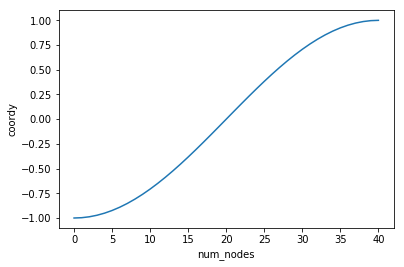

In [22]:
y_1d.plot()

## 1D -> 2D conversion

In [23]:
dr_t.values.shape # time, space

(1022, 451)

In [24]:
data_t_2d = dr_t.values.reshape(-1, ny, nx)
data_p_2d = dr_p.values.reshape(-1, ny, nx)
data_ux_2d = dr_ux.values.reshape(-1, ny, nx)
data_uy_2d = dr_uy.values.reshape(-1, ny, nx)

In [25]:
data_t_2d.shape  # time, y, x

(1022, 41, 11)

## Plot on 2D grid

Text(0.5,1,'tempurature at time step 0')

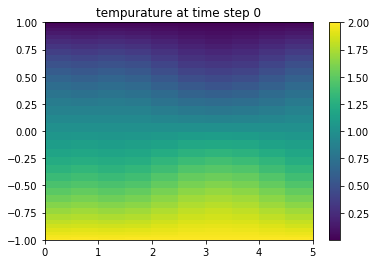

In [26]:
plt.pcolormesh(x_1d, y_1d, data_t_2d[0])  # consistent with previous scatter plot
plt.colorbar()
plt.title('tempurature at time step 0')

Text(0.5,1,'pressure at last time step')

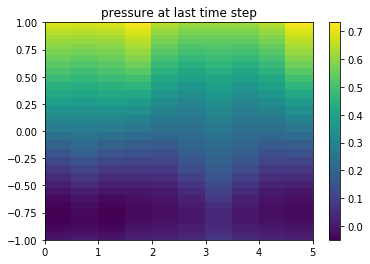

In [27]:
plt.pcolormesh(x_1d, y_1d, data_p_2d[-1])
plt.colorbar()
plt.title('pressure at last time step')

Text(0.5,1,'velocity at last time step')

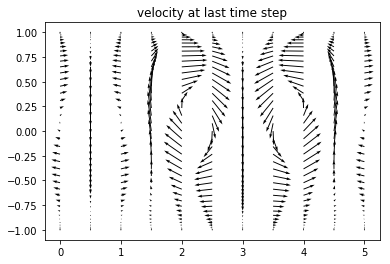

In [28]:
plt.quiver(x_1d, y_1d, data_ux_2d[-1], data_uy_2d[-1])
plt.title('velocity at last time step')